# Preprocesamiento de datos

In [6]:
# Parámetros importantes
width_shape = 48
height_shape = 48
num_classes = 7
epochs = 50
batch_size = 32
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Especifica la ruta del conjunto de datos
dataset_train_path = "./data/images/training"
dataset_val_path = "./data/images/validation"

# Crea generadores de imágenes para entrenamiento y validación
# Configuramos el dataset de entrenamiento y validación
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    dataset_train_path,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', shuffle=True)

val_generator = val_datagen.flow_from_directory(
    dataset_val_path,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', shuffle=True)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Construcción del modelo

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()

## Extracción de Características
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(width_shape, height_shape, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(512, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

## Clasificación
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

# Compilamos y estamos listos para el entrenamiento
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        5

# Configurar TensorBoard

In [3]:
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Entrenamiento del modelo

In [4]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=train_generator.n // batch_size,
    validation_steps=val_generator.n // batch_size,
    callbacks=[tensorboard_callback])

Epoch 1/50
900/900 [==============================] - 52s 56ms/step - loss: 1.7147 - accuracy: 0.3270 - val_loss: 1.8300 - val_accuracy: 0.3514
Epoch 2/50
900/900 [==============================] - 48s 54ms/step - loss: 1.4142 - accuracy: 0.4546 - val_loss: 1.3419 - val_accuracy: 0.4757
Epoch 3/50
900/900 [==============================] - 49s 55ms/step - loss: 1.3047 - accuracy: 0.5011 - val_loss: 1.2242 - val_accuracy: 0.5357
Epoch 4/50
900/900 [==============================] - 49s 55ms/step - loss: 1.2375 - accuracy: 0.5299 - val_loss: 1.2083 - val_accuracy: 0.5469
Epoch 5/50
900/900 [==============================] - 49s 55ms/step - loss: 1.1847 - accuracy: 0.5520 - val_loss: 1.1799 - val_accuracy: 0.5511
Epoch 6/50
900/900 [==============================] - 50s 55ms/step - loss: 1.1440 - accuracy: 0.5642 - val_loss: 1.1451 - val_accuracy: 0.5697
Epoch 7/50
900/900 [==============================] - 49s 55ms/step - loss: 1.1039 - accuracy: 0.5835 - val_loss: 1.1586 - val_accuracy:

# Curvas de entrenamiento

In [6]:
%tensorboard --logdir logs

Launching TensorBoard...

# Grabamos el modelo

In [4]:
model.save("model.h5")

NameError: name 'model' is not defined

# Probamos el modelo

1/1 [==============================] - 0s 326ms/step
surprise


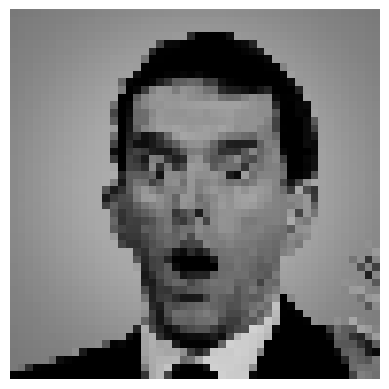

In [13]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

faces = []

# Cargamos una imagen del directorio
imaget_path = "./surprised.png"

# Redimensionamos la imagen y convertimos a gray
face = cv2.cvtColor(cv2.imread(imaget_path), cv2.COLOR_BGR2GRAY)
face = cv2.resize(face, (48, 48))
face2 = img_to_array(face)
face2 = np.expand_dims(face2, axis=0)

faces.append(face2)

charged_model = load_model("model.h5")

# El modelo estima la predicción
preds = charged_model.predict(faces)

print(class_names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(face), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()